<a href="https://colab.research.google.com/github/priyanka10111/Flight_Booking_Price_prediction/blob/main/Flight_Booking_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries  --

 We start off this project by importing all the necessary
libraries that will be required for the process.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Flight_Booking.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
#  Drooping Column Unnamed
df = df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
#  checking shape
df.shape

(300153, 11)

In [7]:
#  checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
#  checking statistical value
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


-->> Checking the missing values in the DataFrame

In [9]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


-->> Checking Duplicate Values

In [10]:
df.duplicated().sum()

0

-->>Data Visualization


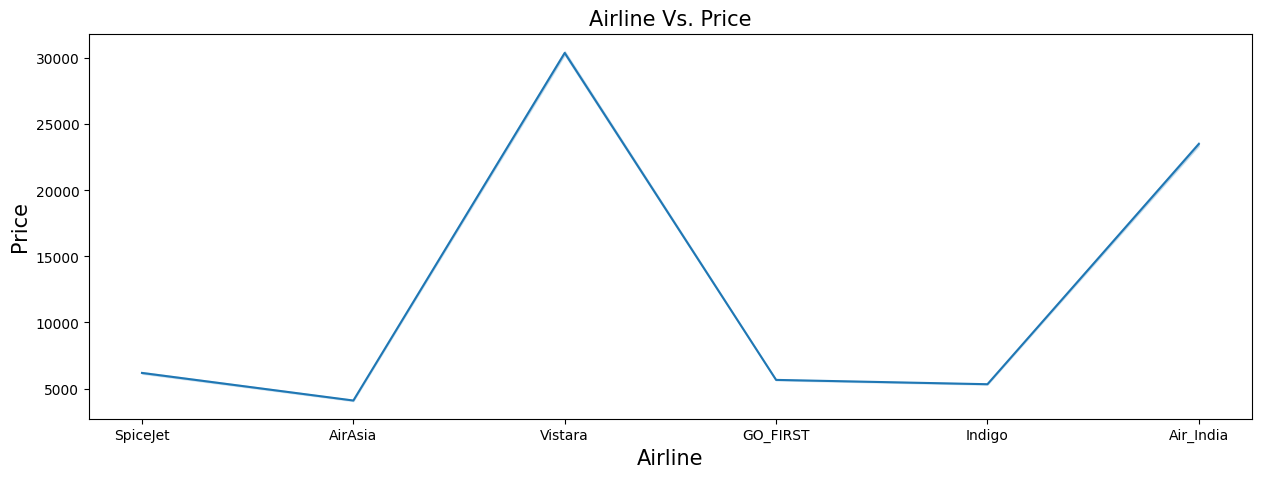

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airline Vs. Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


There is a variation in price with
different airlines

In [12]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

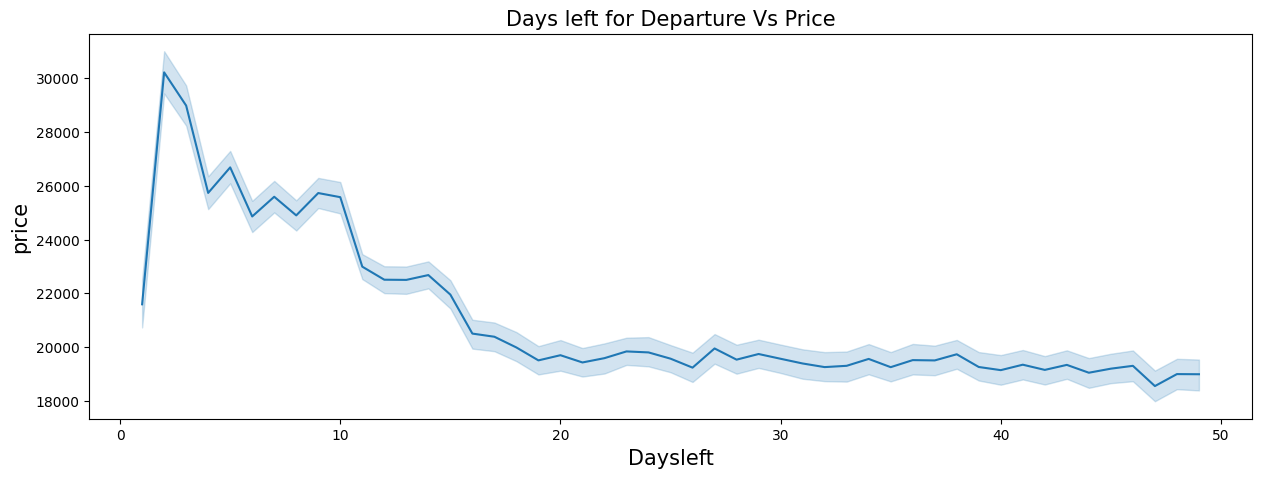

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'],y=df['price'])
plt.title('Days left for Departure Vs Price' , fontsize = 15)
plt.xlabel('Daysleft',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

The Price of the Ticket increases as Day of Departure Decreases

 --> Price Range of All Flights

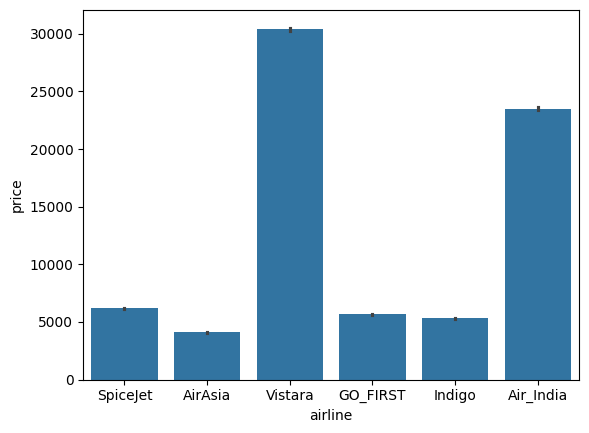

In [14]:
 plt.figure.figsize=(15,5)
 sns.barplot(x='airline' , y ='price' , data = df)
 plt.show()

Vistara airline is costliest Airline and AirAsia is cheapest Airline .

-->>Range of price of all the
flights of Economy and
Business class

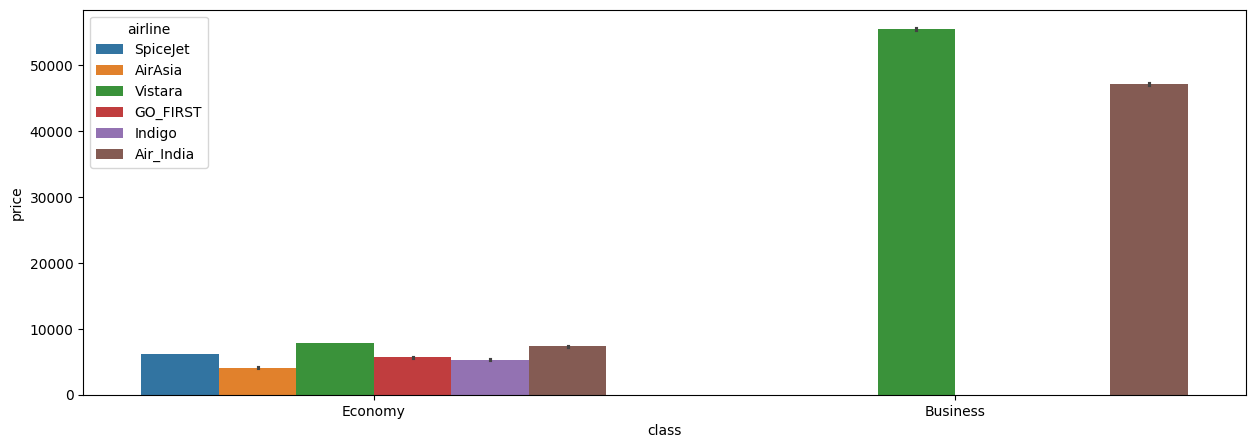

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='class', y = 'price' ,data= df , hue ='airline')
plt.show()

Vistara and Air_India Airlines has most costliest buisness class .  

-->> Range of price of flights with source
and destination city according to
the days left

Text(0, 0.5, 'price')

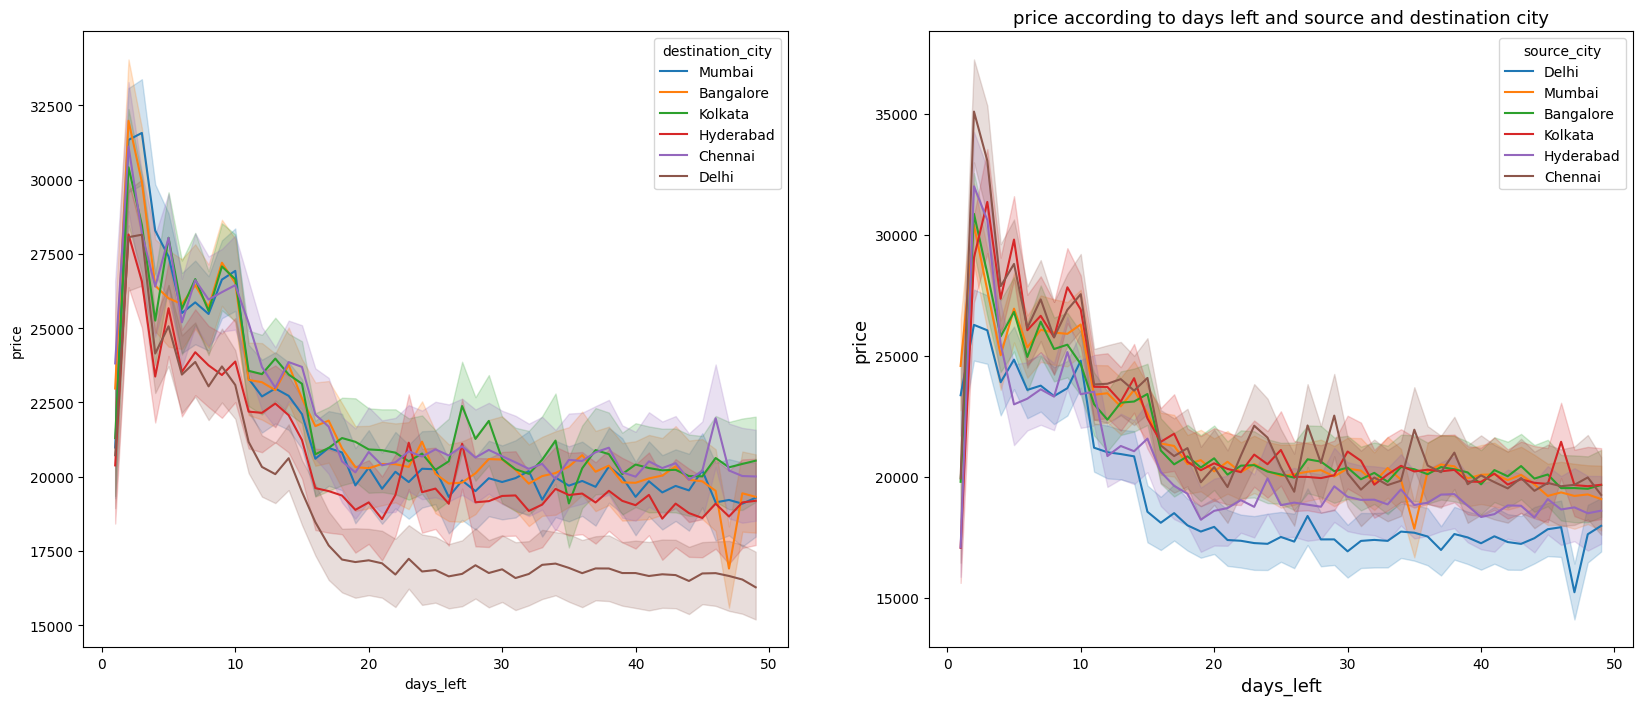

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.lineplot(x='days_left',y='price',hue = 'destination_city' ,data=df,ax=ax[0])
sns.lineplot(x='days_left',y='price',hue='source_city' , data=df, ax=ax[1])
plt.title('price according to days left and source and destination city',fontsize=13)
plt.xlabel('days_left',fontsize=13)
plt.ylabel('price',fontsize=13)

Visualization of categorical features with countplot

Text(0.5, 1.0, 'class')

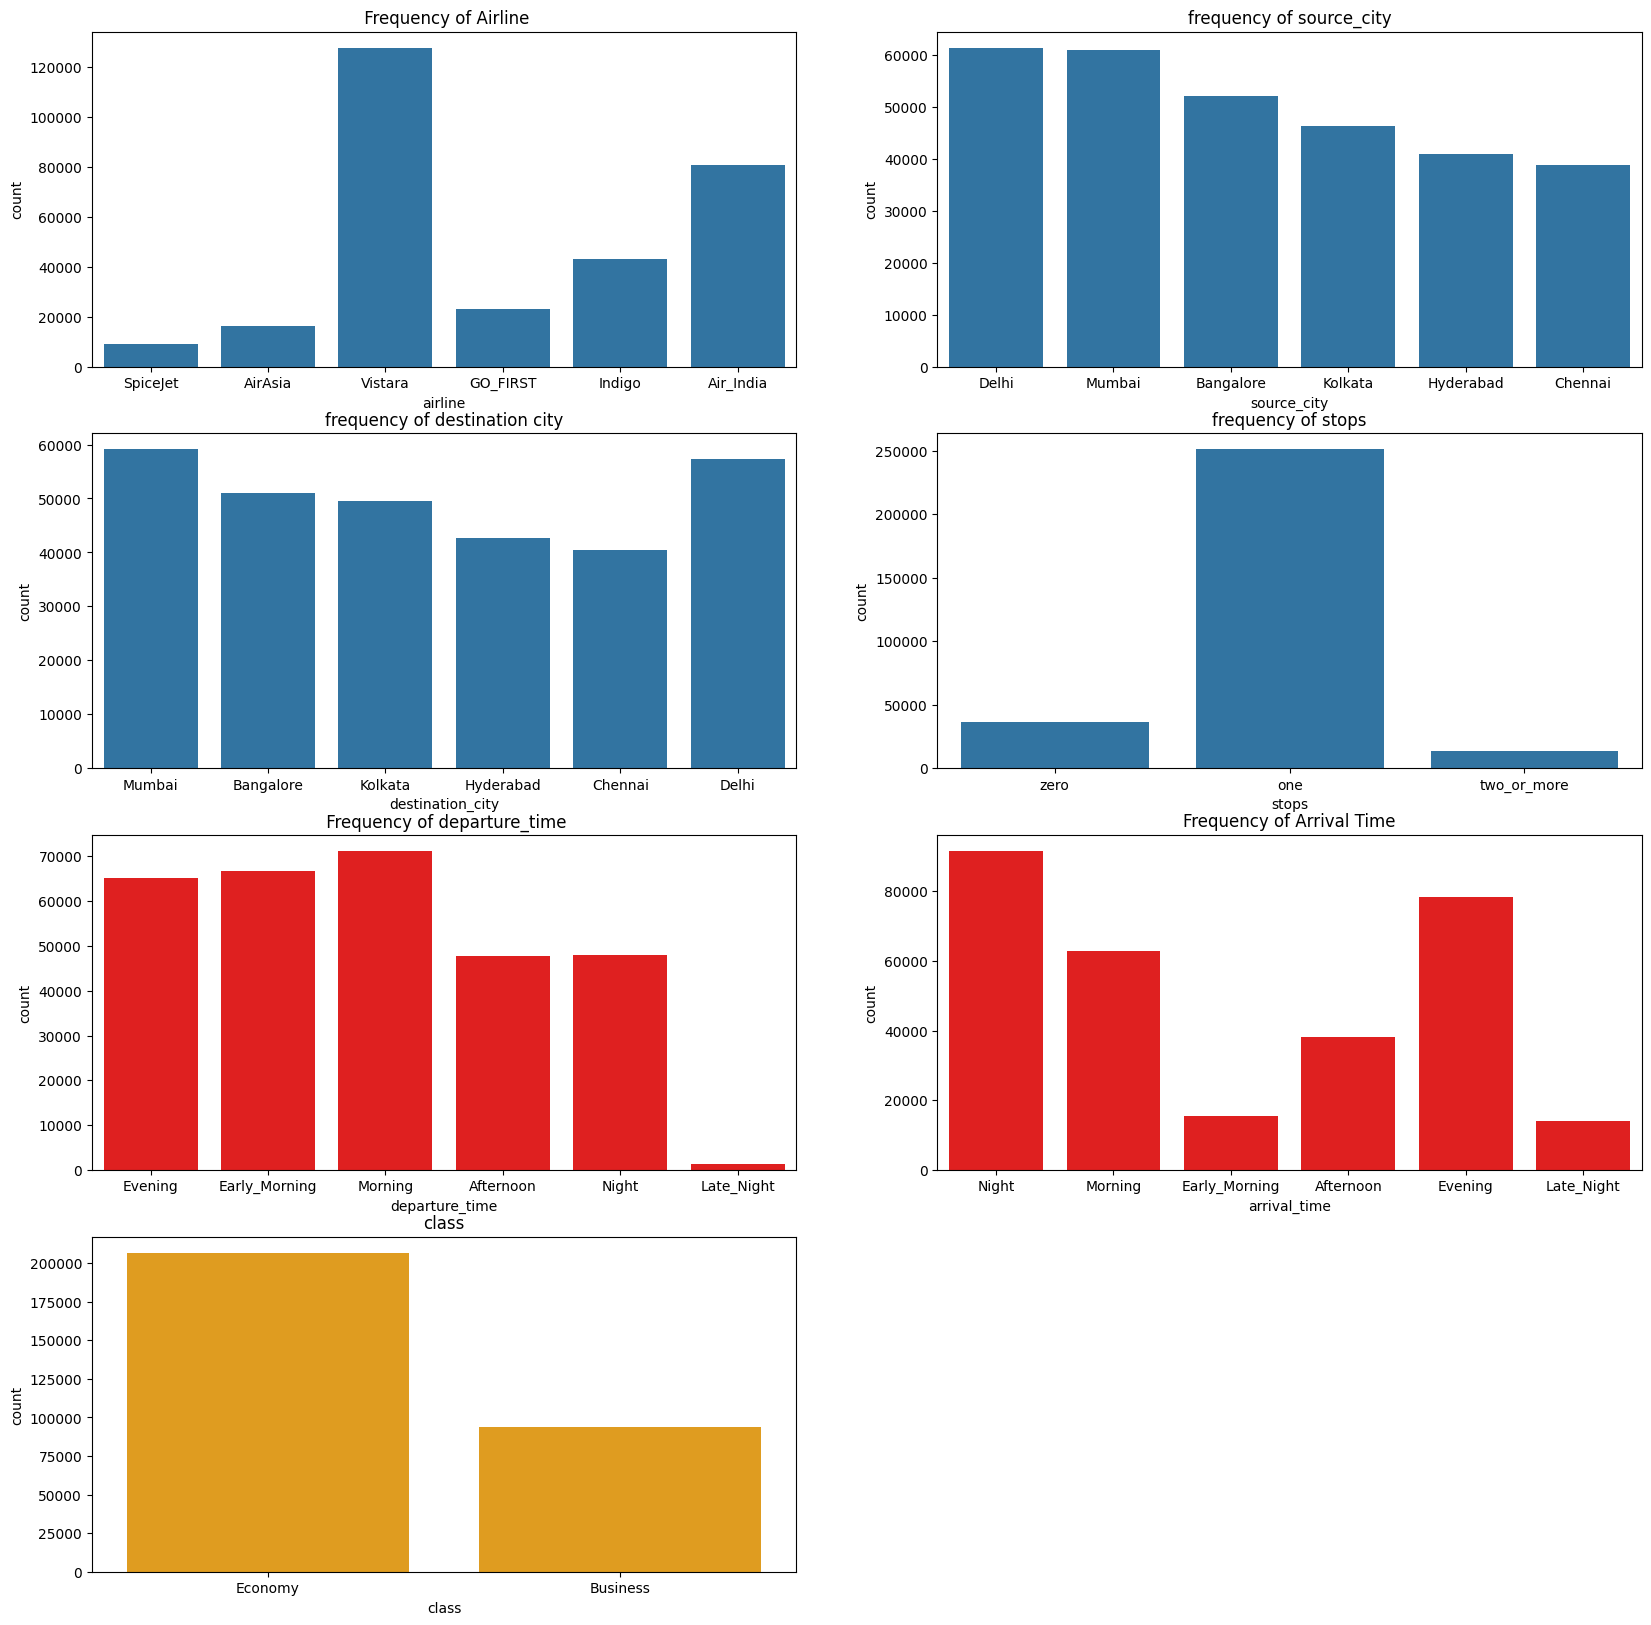

In [17]:
plt.figure(figsize=(20,20))


plt.subplot(4,2,1)
sns.countplot(x= df['airline'], data=df)
plt.title(' Frequency of Airline')

#  Vistara Airlines has most number of flights and Spicejet Airlines has least number or flights .

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('frequency of source_city')

#  Delhi has most frequency as source_city and Chennai has least frequency as source city

plt.subplot(4,2,3)
sns.countplot(x=df['destination_city'],data=df)
plt.title('frequency of destination city')

# Mumbai has most frequency as Destination city and Chennai has least frequency as Destination city

plt.subplot(4,2,4)
sns.countplot(x=df['stops'], data=df)
plt.title('frequency of stops')
# Mostly flights are taking only one stops , two or more stops are least taken

plt.subplot(4,2,5)
sns.countplot(x=df['departure_time'],data=df,color='Red')
plt.title( ' Frequency of departure_time')

#  the time of departure is mostly in the morning and least  is in late_night .


plt.subplot(4,2,6)
sns.countplot(x=df['arrival_time'], data=df , color ='Red')
plt.title('Frequency of Arrival Time')

#  Frequency of arrival time mostly is in the Night and least frequency of arrival time is in the early morning .

plt.subplot(4,2,7)
sns.countplot(x=df['class'], data = df , color = 'Orange')
plt.title('class')

#  most people are booking or travelling in economy class .




Performing One Hot Encoding for categorical features of a
dataframe

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Importing scikit-learn package

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
for i in df.columns:
    if (df[i].dtypes == 'object')  :
        df[i] = le.fit_transform(df[i])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [22]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


Feature Selection

<Axes: >

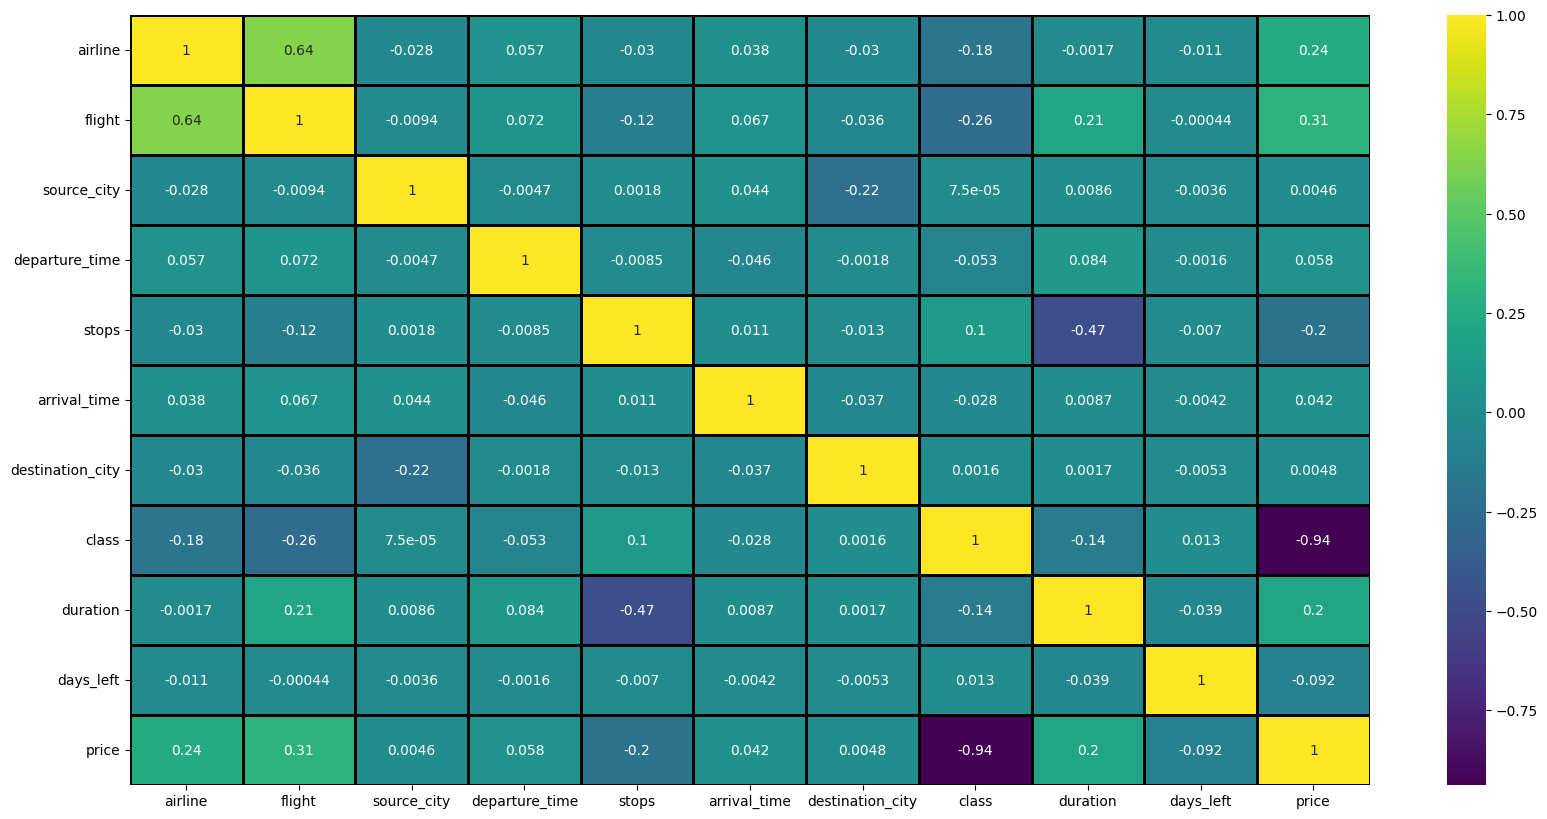

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True , cmap = 'viridis',linecolor ='black' ,linewidths=1)

-->>Selecting the features using
VIF. VIF should be less than 5.
So drop the stops feature.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list= []
for i in df.columns:
    if ((df[i].dtype != 'object') & ( i != 'price')):
        col_list.append(i)

In [25]:
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature']= x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


Dropping the features having VIF more than 5

In [26]:
df = df.drop(columns=['flight'])

In [27]:
col_list = []
for i in df.columns:
    if (df[i].dtype != 'object') & ( i != 'price'):
        col_list.append(i)

In [28]:
x=df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif_data

,features,vif
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [29]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

Applying standardization and implementing Linear Regression Model to
predict the price of a flight.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x= df.drop(columns=['price'])
y=df['price']

x_train , x_test ,y_train, y_test = train_test_split(x,y,train_size=0.75,random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


In [31]:
from sklearn.metrics import *

r2_sc = r2_score(y_test,y_pred)
print(f'r2_score is - {r2_sc}')

rmse = root_mean_squared_error(y_test,y_pred)
print(print(f'rmse is - {rmse}'))

mean_error = mean_absolute_error(y_pred,y_test)
print(f'mean_error is - {mean_error}')

mean_abs_per_error = mean_absolute_percentage_error(y_test,y_pred)
print(f'mean_abs_per_error - {mean_abs_per_error}')

mean_sq_error = mean_squared_error(y_test,y_pred)
print(f'mean_sq_error is - { mean_sq_error}' )

r2_score is - 0.9047635108490827
rmse is - 7007.542325984992
None
mean_error is - 4624.722238536343
mean_abs_per_error - 0.43638546328632744
mean_sq_error is - 49105649.450471155


Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE)
of the Linear regression model is 7007.542325984993 and Mean absolute percentage
error(MAPE) is 43 percent. Lower the RMSE and MAPE better the model.

 -- >>> Plotting the graph of actual
and predicted price of flight ( Linear Regression Model)

<ipython-input-32-aa4931e88dd0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label ='Actual')
<ipython-input-32-aa4931e88dd0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label ='predicted')


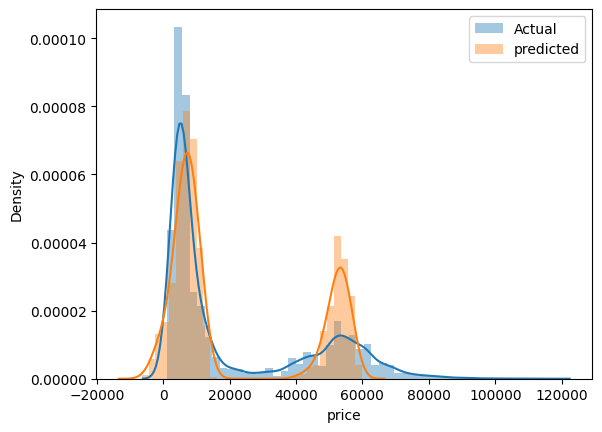

In [32]:
sns.distplot(y_test,label ='Actual')
sns.distplot(y_pred,label ='predicted')
plt.legend()

-- >> Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred

array([ 7366., 72783.,  6195., ...,  5232., 58315.,  2339.])

In [34]:
#  checking RMSE score
rmse_score = root_mean_squared_error(y_test,y_pred)
print(rmse_score)

r2_s = r2_score(y_test,y_pred)
print(r2_s)

3546.3537840032113
0.9756086389420692


In Decision Tree Regressor  model we are getting  rmse  is 3562.11 and r2_score is 0.97 is close to 1 , which means model
is perfectly explaining variance .

-- >>  Plotting the graph of actual
and predicted price of flight ( Decision Tree Regressor)

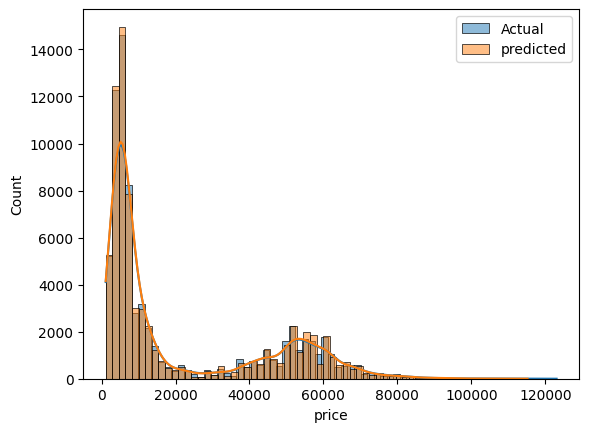

In [35]:
sns.histplot(y_pred,label ='Actual',kde=True)
sns.histplot(y_test,label ='predicted',kde=True)
plt.legend()


--- >>> Random Forest Regressor  

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)
pred = rfr.predict(x_test)
pred



array([ 6547.94, 71292.17,  6195.  , ...,  5250.74, 59261.39,  2863.23])

In [37]:
#  checking accuracy and error in prediction
r2 = r2_score(pred,y_test)
print(r2)

rmse_score = root_mean_squared_error(pred,y_test)
print(rmse_score)


0.984649934820663
2800.48164896914


Root mean square error
RMSE  is 2800.05  which is less than the
linear regression and decision
tree model and r2_score is closer to 1 which means model is explaing variance better than linear and RMSE model .

-- Based on the evaluation metrics, the Random Forest Regressor demonstrated superior performance in predicting [Price target variable]. Its lower  RMSE value, along with a higher R² score, indicate that it provides more accurate and reliable predictions compared to Linear Regression and Decision Tree Regressor.


* Conclusion :-
This project successfully analyzed the flight booking dataset to uncover valuable insights about flight prices,
airline variations, and passenger preferences. The Random Forest Regressor model demonstrated superior performance in predicting flight prices, with a lower RMSE and a higher R² score compared to Linear Regression and Decision Tree models.

The findings from this project can be utilized to provide passengers with valuable information about flight pricing trends, helping them make more informed decisions when booking flights. Additionally, the predictive model can be used by the booking platform to offer personalized recommendations and price alerts to customers, enhancing their overall booking experience.